<ipython-input-4-e5c8e161ece0>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = wine_df.groupby('quality', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))


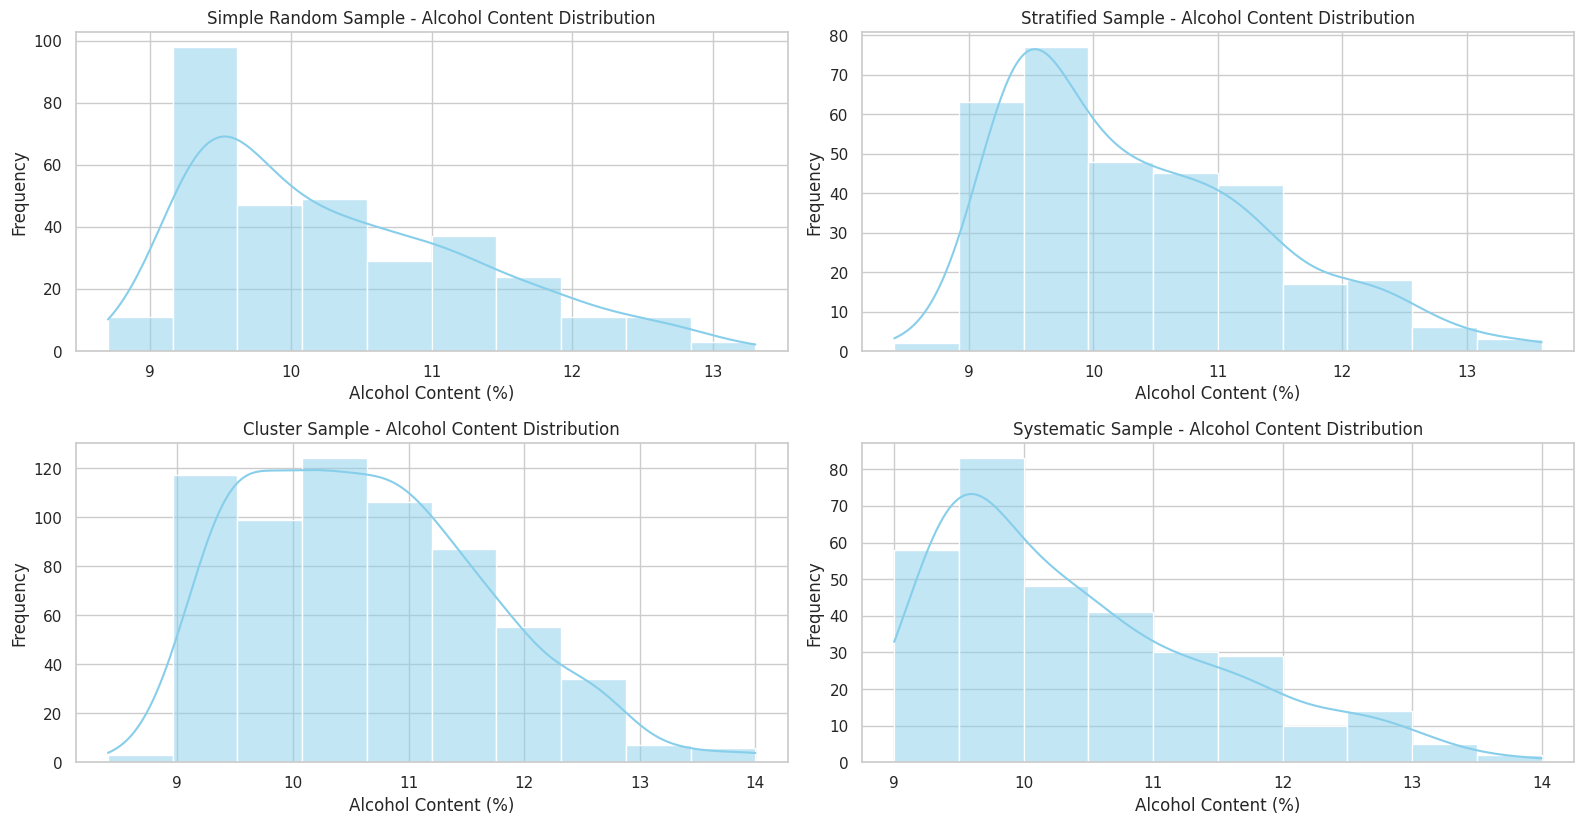

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the Wine Quality Red dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_df = pd.read_csv(url, sep=';')

# 1. Simple Random Sampling (20% sample of the dataset)
simple_random_sample = wine_df.sample(frac=0.2, random_state=1)

# 2. Stratified Sampling (20% sample from each quality level)
stratified_sample = wine_df.groupby('quality', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=1))

# 3. Cluster Sampling (Dividing into clusters based on quality and sampling from one cluster)
cluster_sample = wine_df[wine_df['quality'] == 6]  # Selecting one cluster (quality = 6)

# 4. Systematic Sampling (Selecting every 5th sample in the dataset)
systematic_sample = wine_df.iloc[::5]

# Set the figure size
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

# Visualize alcohol content distribution for each sampling technique
sampling_methods = {
    "Simple Random Sample": simple_random_sample,
    "Stratified Sample": stratified_sample,
    "Cluster Sample": cluster_sample,
    "Systematic Sample": systematic_sample,
}

# Loop through each sampling technique and plot
for i, (method, sample_data) in enumerate(sampling_methods.items(), 1):
    plt.subplot(3, 2, i)
    sns.histplot(sample_data['alcohol'], kde=True, bins=10, color='skyblue')
    plt.title(f"{method} - Alcohol Content Distribution")
    plt.xlabel("Alcohol Content (%)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Load the Wine Quality Red dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_df = pd.read_csv(url, sep=';')

# EDA - Measures of Central Tendency for selected features: acidity, sugar, alcohol
central_tendency = {}
features = ['fixed acidity', 'residual sugar', 'alcohol']  # Acidity, Sugar, Alcohol

for column in features:
    mean = wine_df[column].mean()
    median = wine_df[column].median()
    mode = wine_df[column].mode()[0]  # Taking the first mode in case of multiple modes
    central_tendency[column] = {'Mean': mean, 'Median': median, 'Mode': mode}

# Display central tendency
central_tendency_df = pd.DataFrame(central_tendency).T
print("Measures of Central Tendency (Acidity, Sugar, Alcohol):")
print(central_tendency_df)

# Additional EDA - Checking for missing values
print("\nMissing Values in the dataset:")
print(wine_df.isnull().sum())

# Feature Engineering - Scaling the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df[features])  # Scale acidity, sugar, and alcohol
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df['quality'] = wine_df['quality']  # Add 'quality' back for reference

print("\nScaled Feature Sample (Acidity, Sugar, Alcohol):")
print(scaled_df.head())

Measures of Central Tendency (Acidity, Sugar, Alcohol):
                     Mean  Median  Mode
fixed acidity    8.319637     7.9   7.2
residual sugar   2.538806     2.2   2.0
alcohol         10.422983    10.2   9.5

Missing Values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Scaled Feature Sample (Acidity, Sugar, Alcohol):
   fixed acidity  residual sugar   alcohol  quality
0      -0.528360       -0.453218 -0.960246        5
1      -0.298547        0.043416 -0.584777        5
2      -0.298547       -0.169427 -0.584777        5
3       1.654856       -0.453218 -0.584777        6
4      -0.528360       -0.453218 -0.960246        5
